<a href="https://colab.research.google.com/github/EduardoPatron/Advance-Numerical-Analysis/blob/main/2_bodyProbelm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de los dos cuerpos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Implmentación de los métodos de Euler y RK4 con ciclo while

En estas implementaciones del los IVP solvers se tienen como argumentos
* h: tamaño de paso
* x0: límite inferior del intervalo
* xF: límite superior del intervalo
* y0: arreglo de condiciones iniciales
* f : función del sistema

In [ ]:
# Otra implementación de Euler
def Euler_stepSize(h, x0, xF, y0, f):
  y = [y0]
  while x0 < xF: #Acortando el intervalo
    y.append(y[-1] + h*f(x0, y[-1]))
    x0 += h
  return np.array(y)

# Otra implementación de RK4
def RK4_stepSize(h, x0, xF, y0, f):
  y = [y0]
  while x0 < xF: # Acortando el intervalo
    s1 = np.array(f(x0, y[-1]))
    s2 = np.array(f(x0 + h/2, y[-1] + h/2*s1))
    s3 = np.array(f(x0 + h/2, y[-1] + h/2*s2))
    s4 = np.array(f(x0 + h, y[-1] + h*s3))

    x0 += h #Aumento del paso

    y.append(y[-1] + h/6*(s1 + 2*s2+ 2*s3 + s4))
  return np.array(y)

### Función que describe el sistema y condiciones iniciales

In [ ]:
def twoBody(t, y, *args):
  """
  Estructura de condición inicial:
  y0 = np.array([x1, y1, vx1, vy1, x2, y2, vx2, vy2])

  x1, y1 : posición cartesiana inicial del cuerpo 1
  vx1, vy1 : componentes de velocidad inicial del cuerpo 1
  x2, y2 : posición cartesiana inicial del cuerpo 2
  vx2, vy2: componentes de velocidad inicial del cuerpo 2
  """
  # Distacia entre cuerpos
  dx = y[4] - y[0]
  dy = y[5] - y[1]
  r = (dx**2 + dy**2)**1.5

  # Ecuaciones de aceleración
  ax1 = g*m2*dx/r
  ay1 = g*m2*dy/r
  ax2 = -g*m1*dx/r
  ay2 = -g*m1*dy/r

  # Paso
  return np.array([y[2], y[3], ax1, ay1, y[6], y[7], ax2, ay2])

In [ ]:
# Condicones inciales (propuestas)
m1, m2, g = 0.3, 0.05, 2 # No hay una desproporción de masa tan grande
x1, y1, vx1, vy1 = 2, 2, 0.02, -0.02 # Cuerpo desacelerado
x2, y2, vx2, vy2 = 0, 0, -0.1, 0.1

# Intervalo de la función
x0, xF = 0, 100

# Condiciones iniciales
y0 = np.array([x1, y1, vx1, vy1, x2, y2, vx2, vy2])

##  Tamaño de paso pequeño, **$10e^{-3}$**

In [ ]:
# Tamaño de paso
h = 0.001

# Solvers
sol_twoBody_Euler = Euler_stepSize(h, x0, xF, y0, twoBody)
sol_twoBody_RK4 = RK4_stepSize(h, x0, xF, y0, twoBody)

#### Gráfica de trayectorias

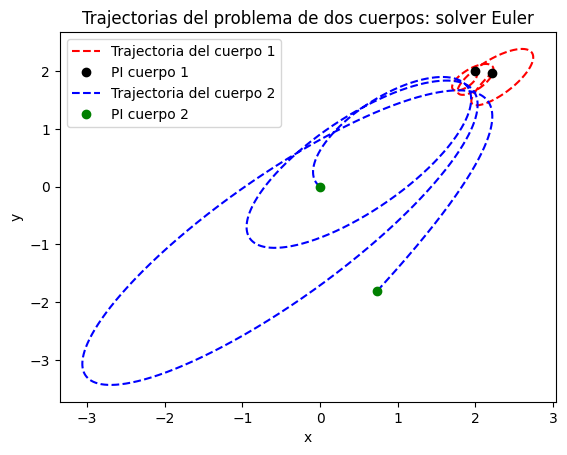

In [ ]:
#--- Gráfica de las trayectorias ---#
# Coordenadas del sistema
x1 = sol_twoBody_Euler[:, 0]
y1 = sol_twoBody_Euler[:, 1]
x2 = sol_twoBody_Euler[:, 4]
y2 = sol_twoBody_Euler[:, 5]

# Cuerpo 1
plt.plot(x1, y1, 'r--', label = 'Trajectoria del cuerpo 1')
plt.plot(x1[0], y1[0], 'ok', label = 'PI cuerpo 1')
plt.plot(x1[-1], y1[-1], 'ok')

# Cuerpo 2
plt.plot(x2, y2, 'b--', label = 'Trajectoria del cuerpo 2')
plt.plot(x2[0], y2[0], 'og', label = 'PI cuerpo 2')
plt.plot(x2[-1], y2[-1], 'og')

plt.title('Trajectorias del problema de dos cuerpos: solver Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

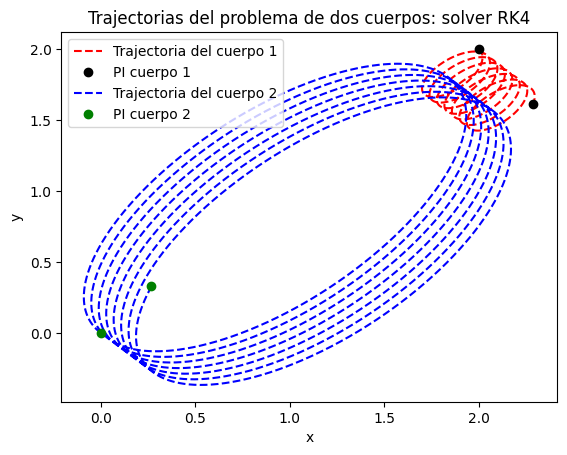

In [ ]:
#--- Gráfica de las trayectorias ---#
# Coordenadas del sistema
x1 = sol_twoBody_RK4[:, 0]
y1 = sol_twoBody_RK4[:, 1]
x2 = sol_twoBody_RK4[:, 4]
y2 = sol_twoBody_RK4[:, 5]

# Cuerpo 1
plt.plot(x1, y1, 'r--', label = 'Trajectoria del cuerpo 1')
plt.plot(x1[0], y1[0], 'ok', label = 'PI cuerpo 1')
plt.plot(x1[-1], y1[-1], 'ok')

# Cuerpo 2
plt.plot(x2, y2, 'b--', label = 'Trajectoria del cuerpo 2')
plt.plot(x2[0], y2[0], 'og', label = 'PI cuerpo 2')
plt.plot(x2[-1], y2[-1], 'og')

plt.title('Trajectorias del problema de dos cuerpos: solver RK4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Tamaño de paso grande, **$10e^{-1}$**

In [ ]:
# Tamaño de paso
h = 0.1

# Solvers
sol_twoBody_Euler = Euler_stepSize(h, x0, xF, y0, twoBody)
sol_twoBody_RK4 = RK4_stepSize(h, x0, xF, y0, twoBody)

#### Gráfica de trayectorias

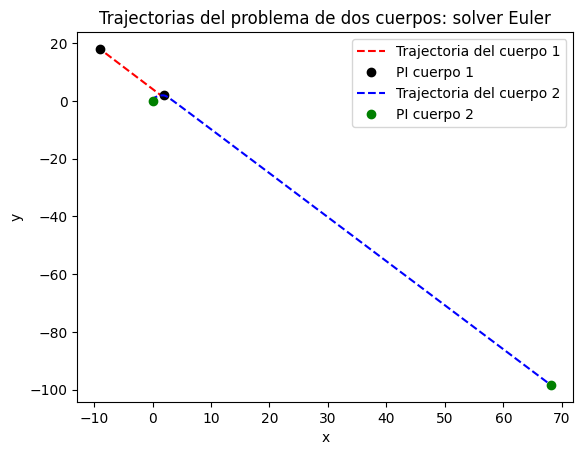

In [ ]:
#--- Gráfica de las trayectorias ---#
# Coordenadas del sistema
x1 = sol_twoBody_Euler[:, 0]
y1 = sol_twoBody_Euler[:, 1]
x2 = sol_twoBody_Euler[:, 4]
y2 = sol_twoBody_Euler[:, 5]

# Cuerpo 1
plt.plot(x1, y1, 'r--', label = 'Trajectoria del cuerpo 1')
plt.plot(x1[0], y1[0], 'ok', label = 'PI cuerpo 1')
plt.plot(x1[-1], y1[-1], 'ok')

# Cuerpo 2
plt.plot(x2, y2, 'b--', label = 'Trajectoria del cuerpo 2')
plt.plot(x2[0], y2[0], 'og', label = 'PI cuerpo 2')
plt.plot(x2[-1], y2[-1], 'og')

plt.title('Trajectorias del problema de dos cuerpos: solver Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

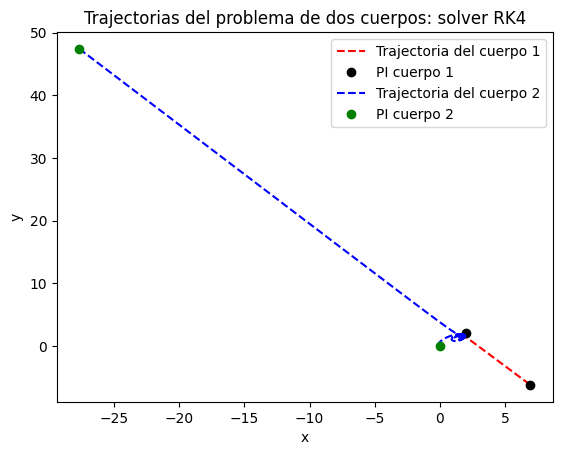

In [ ]:
#--- Gráfica de las trayectorias ---#
# Coordenadas del sistema
x1 = sol_twoBody_RK4[:, 0]
y1 = sol_twoBody_RK4[:, 1]
x2 = sol_twoBody_RK4[:, 4]
y2 = sol_twoBody_RK4[:, 5]

# Cuerpo 1
plt.plot(x1, y1, 'r--', label = 'Trajectoria del cuerpo 1')
plt.plot(x1[0], y1[0], 'ok', label = 'PI cuerpo 1')
plt.plot(x1[-1], y1[-1], 'ok')

# Cuerpo 2
plt.plot(x2, y2, 'b--', label = 'Trajectoria del cuerpo 2')
plt.plot(x2[0], y2[0], 'og', label = 'PI cuerpo 2')
plt.plot(x2[-1], y2[-1], 'og')

plt.title('Trajectorias del problema de dos cuerpos: solver RK4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()